In [ ]:
#Menghubungkan google collab dengan gdrive dengan cara mengimpor 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import library
import numpy as np
np.random.seed(10)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
#read data
data = pd.read_csv('gdrive/My Drive/Kelompok5-APM/Pertemuan 7/passenger.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#encoding data to string
dict_live = { 
    0 : 'Perished',
    1 : 'Survived'
}

#encoding data from string
dict_sex = {
    'male' : 0,
    'female' : 1
}

data['Bsex'] = data['Sex'].apply(lambda x : dict_sex[x])

features = data[['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

In [7]:
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else :
        f = 1/(1+ np.exp(- x))
        
    return f

def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True):
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
        
    return f

In [8]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 623
Test records: 268


In [10]:
#modelling 
p=4 # Layer 1
q=4 # Layer 2

#set up learning rate
eta =  1/623

# random initialize the relevand data
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

#memulai looping 
for I in range(0, X_train.shape[0]): #loop in all the passengers:

    x = X_train[I]
    
    #memulai algoritma
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    mu.append((1/2)*(y-Y_train[I])*2)
    vec_y.append(y[0])
    
    print("Iterasi ke-" + str(I), y, wOut, bOut,
          "Error :" + str(np.abs(np.sum(mu) / np.sum(vec_y))))

Iterasi ke-0 [0.99521598] [0.10522152 0.12713196 0.04045035 1.29996831] [0.96665943] Error :1.0
Iterasi ke-1 [0.98282578] [0.10523605 0.1271644  0.04046086 1.29997658] [0.96666489] Error :0.49444950030945234
Iterasi ke-2 [0.95495628] [0.10467938 0.12574052 0.04036052 1.29967016] [0.9663573] Error :0.6590519369203078
Iterasi ke-3 [0.99798133] [0.10288639 0.12220631 0.04012213 1.29889364] [0.96604206] Error :0.7456104682324431
Iterasi ke-4 [0.98350227] [0.10290381 0.1222444  0.04012213 1.29890129] [0.9660473] Error :0.5930394801916474
Iterasi ke-5 [0.95304365] [0.10234831 0.1208231  0.0400221  1.29859858] [0.96574007] Error :0.6591407955306241
Iterasi ke-6 [0.95248034] [0.10179315 0.11940258 0.03992216 1.29829695] [0.96543294] Error :0.7067451098326697
Iterasi ke-7 [0.99767618] [0.10000219 0.11587203 0.03968446 1.29753201] [0.96511775] Error :0.7441696847317987
Iterasi ke-8 [0.9929425] [0.1000115  0.11589117 0.03968745 1.29753635] [0.96511998] Error :0.6595019949093135
Iterasi ke-9 [0.98

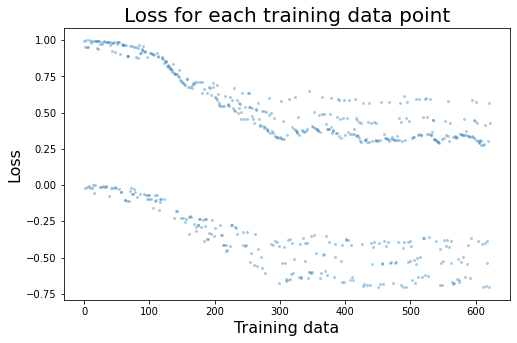

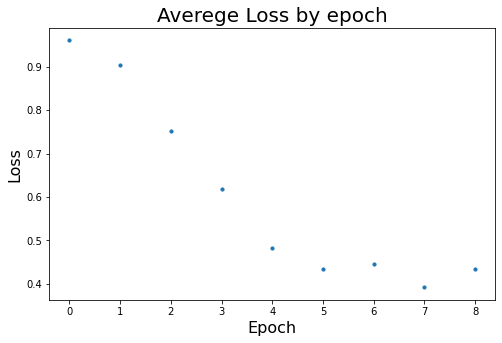

In [11]:
#Plotting the Cost function for each training data
plt.figure(figsize=(8,5))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

#Plotting the average cost function over 10 training data
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)
    
plt.figure(figsize=(8,5))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

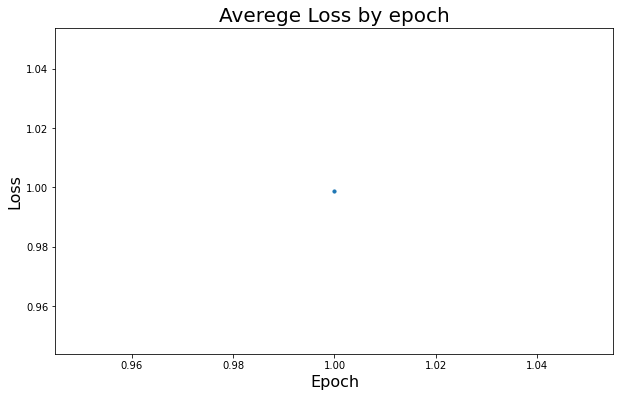

In [14]:
#define model as training function
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    #0: Random initialize the relevant data
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)
    
    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)
    
    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)
    
    mu = []
    vec_y = []
    
    #Start looping over the passengers, i.e. over I.
    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
        x = X_train[I]
        
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
        
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
        
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
        
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
        
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
        
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
        
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
        
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
        
        plt.figure(figsize=(10,6))
        plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
        plt.title('Averege Loss by epoch', fontsize=20)
        plt.xlabel('Epoch', fontsize=16)
        plt.ylabel('Loss', fontsize=16)
        plt.show()
        
        return w1, b1, w2, b2, wOut, bOut, mu

#memanggil function dan show plotting
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=8, q=4, eta=0.0015)

In [19]:
#mendefinisikan model sebagai fungsi testing (prediksi)
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        x = X_test[I]
        
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    return np.array(pred);

predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

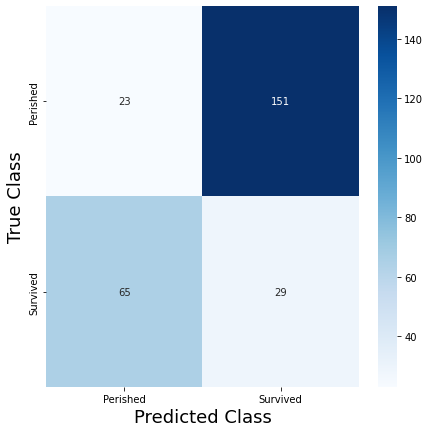

0.19402985074626866

In [23]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

accuracy_score(Y_test, predictions)